In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widget
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load training data
for label in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

# Load testing data
for label in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Shuffle the data
X_train, Y_train = shuffle(X_train, Y_train, random_state=100)

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=100)

# Convert labels to categorical format
y_train = tf.keras.utils.to_categorical([labels.index(label) for label in y_train], num_classes=len(labels))
y_test = tf.keras.utils.to_categorical([labels.index(label) for label in y_test], num_classes=len(labels))


In [50]:
y_train.shape

(5618, 4)

In [46]:
from keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=32,kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=512,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation="softmax"))


In [47]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [52]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1)


Epoch 1/20
158/158 [==============================] - 532s 3s/step - loss: 1.4014 - accuracy: 0.4444 - val_loss: 0.9966 - val_accuracy: 0.5836
Epoch 2/20
158/158 [==============================] - 527s 3s/step - loss: 0.7920 - accuracy: 0.6729 - val_loss: 0.6745 - val_accuracy: 0.7153
Epoch 3/20
158/158 [==============================] - 528s 3s/step - loss: 0.5827 - accuracy: 0.7629 - val_loss: 0.5948 - val_accuracy: 0.7580
Epoch 4/20
158/158 [==============================] - 527s 3s/step - loss: 0.4765 - accuracy: 0.8093 - val_loss: 0.3518 - val_accuracy: 0.8470
Epoch 5/20
158/158 [==============================] - 527s 3s/step - loss: 0.3615 - accuracy: 0.8633 - val_loss: 0.3503 - val_accuracy: 0.8452
Epoch 6/20
158/158 [==============================] - 527s 3s/step - loss: 0.3099 - accuracy: 0.8801 - val_loss: 0.3057 - val_accuracy: 0.8683
Epoch 7/20
158/158 [==============================] - 533s 3s/step - loss: 0.2500 - accuracy: 0.9021 - val_loss: 0.3556 - val_accuracy: 0.8754

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


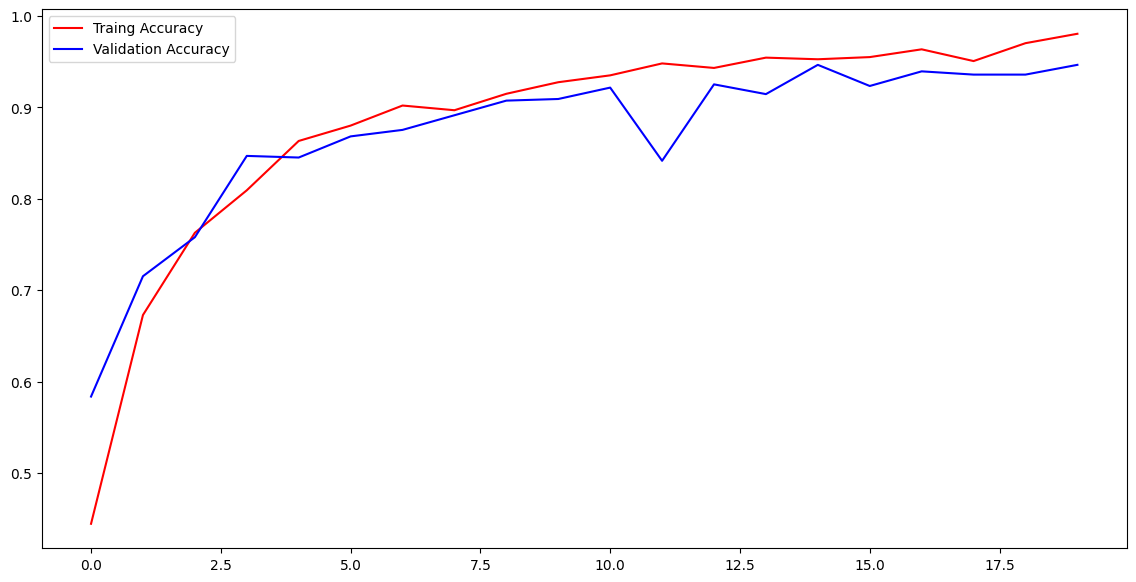

In [53]:
model.save('braintumor.h5')
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Traing Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

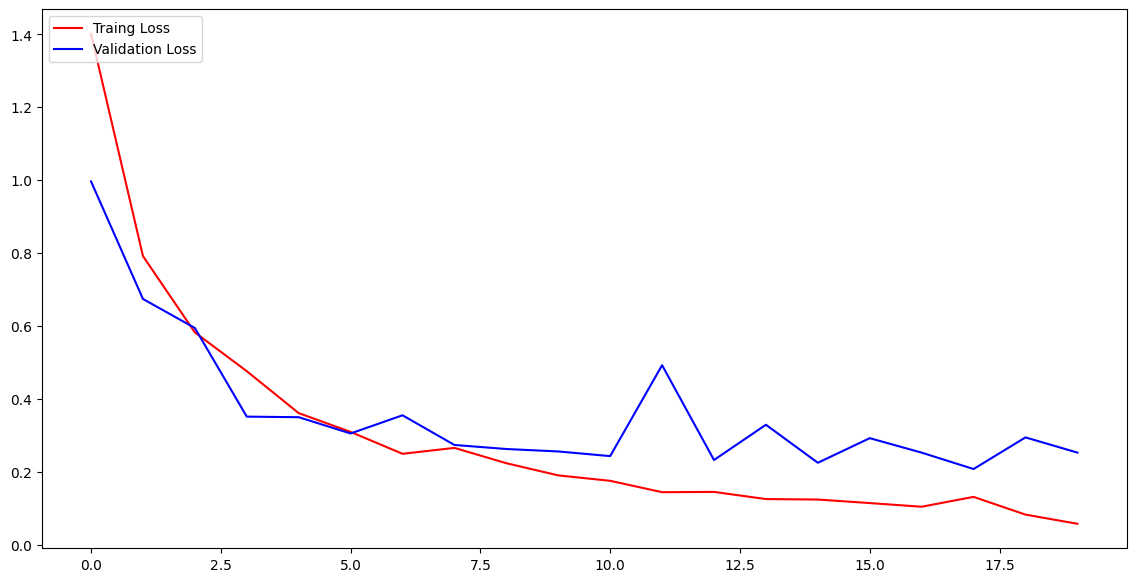

In [54]:

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Traing Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.legend(loc='upper left')
plt.show()

In [71]:
img= cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0023.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape



(150, 150, 3)

In [72]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape



(1, 150, 150, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

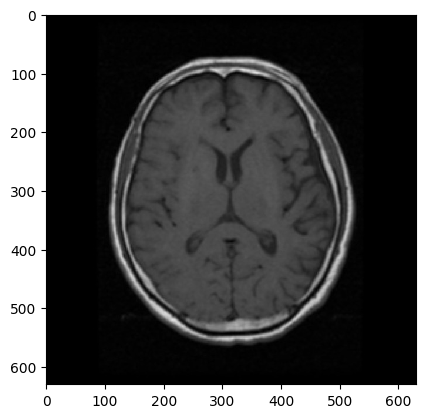

In [73]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0023.jpg')
plt.imshow(img,interpolation='nearest')
plt.show



In [74]:
a=model.predict(img_array)
indices= a.argmax()
if(indices == 0):
  print('The person is a Glioma patient')
elif(indices == 1):
  print('The person is a Meningioma patient')
elif(indices == 2):
  print('The person is Not a patient')
else:
  print('The person is a Pituitary patient')

1/1 [==============================] - 0s 58ms/step
The person is Not a patient
